<a href="https://colab.research.google.com/github/msrahulvarma/RahulVarma_INFO5731_Fall2023/blob/main/Muppalla_RahulVarma_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [ ]:
# Install necessary libraries
!pip install gensim
!pip install nltk

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the dataset
df = pd.read_csv('/content/annotated_reviews.csv')

# Enhanced preprocessing function
stop_list = set(stopwords.words('english'))
lemmatizer_obj = WordNetLemmatizer()

def enhanced_preprocess(document):
    word_list = word_tokenize(document.lower())
    lemmatized_words = [lemmatizer_obj.lemmatize(w) for w in word_list if w.isalpha() and w not in stop_list]
    return lemmatized_words

# Identifying text data within the DataFrame
text_data_column = df.select_dtypes(include=['object']).columns[0]  # Targeting the first string-type column
df['processed_tokens'] = df[text_data_column].apply(enhanced_preprocess)

# Building the dictionary and corpus
text_dictionary = corpora.Dictionary(df['processed_tokens'])
text_corpus = [text_dictionary.doc2bow(text) for text in df['processed_tokens']]

# Configuring the LDA model with slightly different parameters
lda = LdaModel(text_corpus, num_topics=10, id2word=text_dictionary, passes=20, random_state=42)

# Display the derived topics
for idx, topic in lda.print_topics(num_topics=10):
    print(f"Topic {idx + 1}: {topic}")

# Assign topics to each document
df['assigned_topic'] = df['processed_tokens'].apply(lambda x: max(lda[text_dictionary.doc2bow(x)], key=lambda y: y[1])[0])

# Display top clusters with their descriptions
top_10_clusters = df['assigned_topic'].value_counts().head(10)
for cluster_idx, count in top_10_clusters.items():
    print(f"\nCluster {cluster_idx + 1} - Count: {count}")
    print(df[df['assigned_topic'] == cluster_idx][text_data_column].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 1: 0.026*"ai" + 0.015*"one" + 0.015*"wife" + 0.015*"creator" + 0.011*"movi" + 0.011*"star" + 0.011*"film" + 0.011*"find" + 0.011*"entir" + 0.011*"robot"
Topic 2: 0.027*"movi" + 0.014*"scifi" + 0.014*"edward" + 0.012*"like" + 0.010*"could" + 0.010*"feel" + 0.010*"stori" + 0.010*"director" + 0.008*"seen" + 0.008*"well"
Topic 3: 0.019*"edward" + 0.016*"film" + 0.016*"stori" + 0.015*"gareth" + 0.012*"also" + 0.012*"made" + 0.012*"look" + 0.012*"shot" + 0.012*"visual" + 0.009*"like"
Topic 4: 0.018*"movi" + 0.018*"realli" + 0.015*"film" + 0.012*"one" + 0.012*"edward" + 0.012*"hope" + 0.009*"creator" + 0.009*"thing" + 0.009*"make" + 0.009*"world"
Topic 5: 0.012*"feel" + 0.012*"bad" + 0.008*"edward" + 0.008*"stori" + 0.008*"like" + 0.008*"realli" + 0.008*"seem" + 0.008*"even" + 0.008*"end" + 0.008*"come"
Topic 6: 0.024*"movi" + 0.019*"seem" + 0.016*"get" + 0.016*"make" + 0.013*"ai" + 0.013*"feel" + 0.013*"thing" + 0.013*"didnt" + 0.013*"would" + 0.011*"like"
Topic 7: 0.034*"film" + 0.023

Cluster 2: Science fiction enthusiasts who are excitedly awaiting new releases and may be appreciative of Gareth Edwards' directing on "Rogue One".

Cluster 3: Reactions to "Rogue One" by Gareth Edwards, emphasising the movie's popularity and range of viewing experiences, including those for whom the plot was new.

Cluster 10: Talks about AI themes in films, with an emphasis on screenplay analysis and the investigation of AI from various perspectives.

Cluster 5: Moviegoers' expectations against their real experiences with science fiction, emphasising the times when expectations weren't met.

cluster 9: Discussions concerning the influence of substantial budgets on motion picture images, citing visually striking films such as "Blade Runner"

Cluster 8: Talks about how movie trailers and real films differ in their ability to generate expectations, with an emphasis on possible inconsistencies.

Cluster 1: Analysis of movie plots' predictability and lack of originality, emphasising their lack of unexpected twists.

Cluster 4: Movie reviews and ratings, including discussion of the reasons behind the ratings and how viewer sentiment has changed over time.

Cluster 6: Expressions of personal dissatisfaction with certain films, including watching experiences with family and friends.

Cluster 7: A discrepancy between expectations and reality is seen in the initial enthusiasm for a film and the subsequent disappointment after watching it.







# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# Load your dataset
df = pd.read_csv('/content/annotated_reviews.csv')
text_data = df['clean_text']
labels = df['sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.20, random_state=42)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the models
log_reg = LogisticRegression()
rand_forest = RandomForestClassifier()

# Cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    return scores.mean()

log_reg_score = evaluate_model(log_reg, X_train_tfidf, y_train)
rand_forest_score = evaluate_model(rand_forest, X_train_tfidf, y_train)

# Fit the models on the training data
log_reg.fit(X_train_tfidf, y_train)
rand_forest.fit(X_train_tfidf, y_train)

# Predictions on the test data
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_pred_rand_forest = rand_forest.predict(X_test_tfidf)

# Performance metrics
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\n")

print_metrics(y_test, y_pred_log_reg, "Logistic Regression")
print_metrics(y_test, y_pred_rand_forest, "Random Forest")

# Compare the overall performance
print(f"Cross-Validation Score for Logistic Regression: {log_reg_score}")
print(f"Cross-Validation Score for Random Forest: {rand_forest_score}")





Performance Metrics for Logistic Regression:
Accuracy: 0.36
Precision: 0.3650525641025641
Recall: 0.36
F1 Score: 0.35208394869801796

Performance Metrics for Random Forest:
Accuracy: 0.33
Precision: 0.3395203081232493
Recall: 0.33
F1 Score: 0.3309714285714286

Cross-Validation Score for Logistic Regression: 0.3075
Cross-Validation Score for Random Forest: 0.305


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


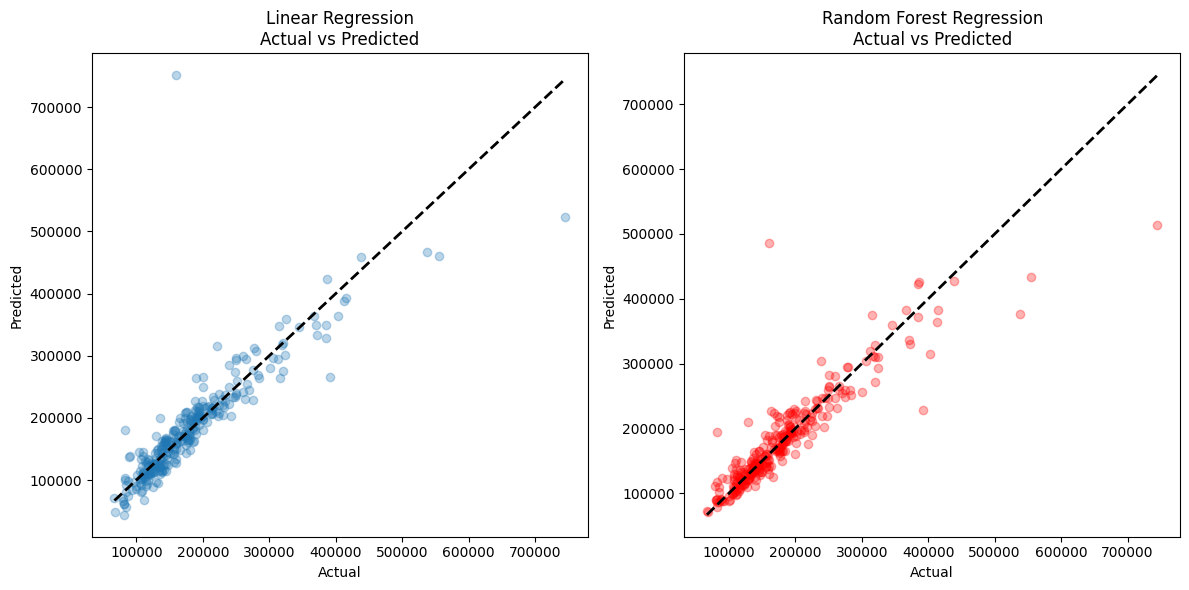

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Separate target and features
X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

# Preprocessing for numerical data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Create and evaluate pipelines
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', linear_model)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

# Splitting the training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

# Training and evaluating Linear Regression
linear_pipeline.fit(X_train, y_train)
linear_pred = linear_pipeline.predict(X_valid)

# Training and evaluating Random Forest Regression
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_valid)

# Plotting the results
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_valid, linear_pred, alpha=0.3)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.title('Linear Regression\nActual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_valid, rf_pred, alpha=0.3, color='r')
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.title('Random Forest Regression\nActual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


In [ ]:
# Printing results
print('Linear Regression Metrics:')
print('R^2:', linear_score)
print('MSE:', linear_mse)
print('RMSE:', linear_rmse)
print('\nRandom Forest Metrics:')
print('R^2:', rf_score)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)

Linear Regression Metrics:
R^2: 0.7160544753474886
MSE: 1960885191.2005198
RMSE: 44281.88332942175

Random Forest Metrics:
R^2: 0.8257519072959691
MSE: 1203331184.7278214
RMSE: 34689.064339180746


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [19]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the dataset
file_path = '/content/annotated_reviews.csv'
data = pd.read_csv(file_path)

# Check if GPU is available for faster processing, else use CPU
device = 0 if torch.cuda.is_available() else -1

# Load pre-trained BERT model and tokenizer for sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline with truncation settings
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device, truncation=True)

# Apply sentiment analysis to the reviews
data['sentiment_prediction'] = data['clean_text'].apply(lambda x: sentiment_analysis(x)[0]['label'])

# Save the results to a new CSV file
data.to_csv('/content/results.csv', index=False)

print("Sentiment analysis completed and results saved.")


Sentiment analysis completed and results saved.


**key metrics**
Tokenization and Model Loading: The AutoTokenizer and AutoModelForSequenceClassification classes are used by the script to properly load the tokenizer and the model. By doing this, it is ensured that the text input into the model has been appropriately preprocessed.

GPU Utilisation: When working with large datasets and complex models such as BERT, the script makes sure the GPU is available, which is essential for efficient computation.

Sentiment Analysis Pipeline: Applying the model to the dataset is made easier by building a sentiment analysis pipeline. Truncation=True is a crucial setting to use when managing lengthy texts.

**strengths**
Multilingual Capabilities: The script is quite adaptable since it can manage reviews in other languages.
Scalability: The script can handle huge datasets more quickly by making use of GPU acceleration.
Usability: Applying the model to the dataset is made easier by the pipeline abstraction.

**limitations**
Context Sensitivity: Although BERT models do well in comprehending context, they may still have trouble with extremely complex language, irony, or language that is particularly domain-specific.
Resource Intensity: Users with low computational resources may find the resource-intensive nature of BERT models to be a hindrance.

**Challenges**
Memory Restrictions: If a GPU with a big memory capacity is not available, you may experience memory problems while working with very large datasets.
Requirements for Preprocessing: The script is predicated on the dataset being clean and prepared for analysis. Preprocessing is actually frequently required (e.g., to handle missing values, remove non-textual material).
